<font size = 40 color=darkgreen>Dutch Rental Prices</font><br>
*Both my friends and myself have often asked the question, 'How much rent could I charge for my apartment?' The question becomes very complex as we start assuming that location, size, amenities, furnished, and many more attributes need to be considered when deciding on a rental price. My goal for this project is to build a model that will weigh all the attributes available using data from a popular rental website in the Netherlands, Kamernet. <BR>  
*Creating a regression model to predict the rental prices in the Netherlands using data from kamernet.nl*<br>
**Steps:**<br>
1. Importing libraries and reading data
2. EDA and re-shaping data for ML pre-processing 
3. PyCaret setup
4. Adjust base data, repeat compare and create steps

# <font color=teal>Import data</font>

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# ML libraries
import pycaret.regression as py
from pycaret.regression import *

# Options for pandas
pd.options.display.max_columns
pd.options.display.max_rows = 30

# Visualizations
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import chart_studio.plotly as pl
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

In [3]:
# Reading json data from Kamernet

#Git
source = 'https://github.com/michael-william/Netherlands-Rental-Prices/raw/master/properties-trim.json'
df=pd.read_json(source, lines=True)


# <font color=teal>EDA and reshaping data</font>

> **<font color=brown>Overview</font>**
> 1. Dropping non-needed columns
> 2. Missing values
> 3. Cardinality of categorical values

In [66]:
# Creating copy of main df
data = df[['areaSqm', 'latitude', 'longitude', 'propertyType', 'roommates','rent']]

In [67]:
# converting 'roommates' feature to 'int' and creating a new binary feature called 'shared'
data['roommates'] = data.roommates.replace(to_replace='None', value=0)
data['roommates'] = data.roommates.replace(to_replace='More than 8', value=9)
data['roommates'] = data.roommates.replace(to_replace='Unknown', value=0)
data['roommates'] = data.roommates.replace(to_replace='nan', value=0)
data['roommates'] = data.roommates.fillna(0)
data['roommates'] = data.roommates.astype('int')
data['shared'] = [1 if x>0 else 0 for x in data.roommates]
data['shared'] = ['Yes' if x>0 else 'No' for x in data.roommates]
data.drop('roommates', axis=1, inplace=True)

In [68]:
data.to_csv("ml_data.csv")

In [70]:
py.setup(data, target='rent', silent=True)

 
Setup Succesfully Completed!


(       areaSqm   latitude  longitude  propertyType_Anti-squat  \
 0         14.0  51.896601   4.514993                      0.0   
 1         30.0  52.370200   4.920721                      0.0   
 2         11.0  52.350880   4.854786                      0.0   
 3         16.0  53.013494   6.561012                      0.0   
 4         22.0  51.932871   4.479732                      0.0   
 ...        ...        ...        ...                      ...   
 12825     35.0  52.368030   5.205308                      0.0   
 12826     10.0  51.690365   5.311952                      0.0   
 12827     12.0  52.010965   4.336536                      0.0   
 12828     16.0  52.008520   4.390628                      0.0   
 12829     21.0  51.906095   4.445226                      0.0   
 
        propertyType_Apartment  propertyType_Room  \
 0                         0.0                1.0   
 1                         0.0                0.0   
 2                         0.0                1

In [133]:
rf_new = py.create_model('rf', fold=5, verbose=False)

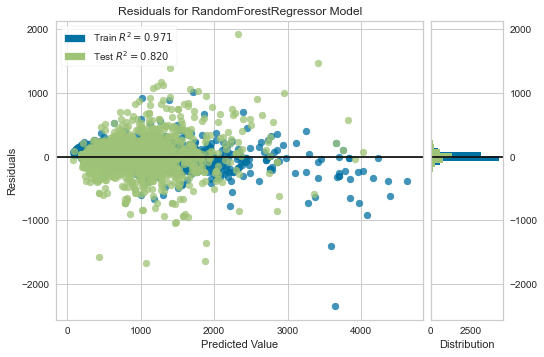

In [134]:
py.plot_model(rf_new)

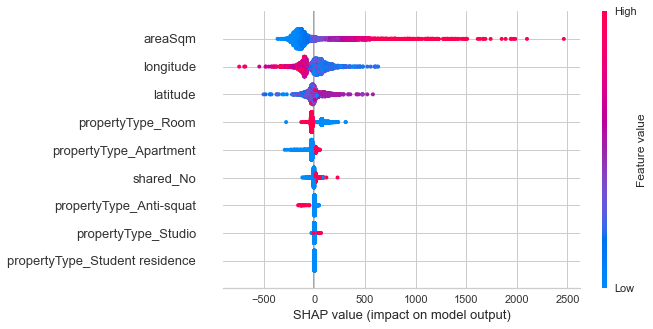

In [135]:
py.interpret_model(rf_new)

In [72]:
rf = finalize_model(rf_new)

In [75]:
label_df = predict_model(rf, data=data)

In [93]:
test = data.iloc[1:2]

In [94]:
test

areaSqm  latitude  longitude propertyType  rent shared
1       30   52.3702   4.920721       Studio   950     No

In [82]:
label_df['diff'] = label_df['Label']-label_df['rent']

In [95]:
py.predict_model(rf, data=test)

areaSqm  latitude  longitude propertyType  rent shared    Label
0       30   52.3702   4.920721       Studio   950     No  995.225

In [84]:
label_df['diff'].describe()

count    12830.000000
mean         1.773761
std         74.506971
min      -2221.805000
25%        -18.050000
50%          1.255000
75%         22.462525
max       1240.950000
Name: diff, dtype: float64

In [100]:
data[['latitude', 'longitude']].describe()

latitude     longitude
count  12830.000000  12830.000000
mean      52.146481      5.304646
std        0.508045      0.802236
min       50.770041      3.554188
25%       51.918408      4.660486
50%       52.112349      5.083929
75%       52.358147      5.876862
max       53.333967      7.036756

In [126]:
hundredm = 0.00150

In [103]:
origin_long = 4.8798
origin_lat = 52.3887

In [116]:
data['long_from_origin'] = [abs(x-origin_long) for x in data['longitude']]
data['lat_from_origin'] = [abs(x-origin_lat) for x in data['latitude']]

In [130]:
data[(data['long_from_origin']<hundredm) & (data['lat_from_origin']<hundredm) & (data['propertyType'] == 'Apartment')]

areaSqm   latitude  longitude propertyType  rent shared  long_meters  \
5444        60  52.389722   4.879380    Apartment   900     No    -0.000420   
7757        43  52.387494   4.879683    Apartment  1400     No    -0.000117   
11737       75  52.390088   4.878650    Apartment  1800     No    -0.001150   

       lat_meters  long_from_origin  lat_from_origin  
5444     0.001022          0.000420         0.001022  
7757    -0.001206          0.000117         0.001206  
11737    0.001388          0.001150         0.001388

In [ ]:
data.query[abs('latitude')]